<a href="https://colab.research.google.com/github/bintangnabiil/Deep_Learning/blob/main/Deep_Learning_Bidirectional_RNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#A. IMDb Dataset

##1) Load IMDb Dataset

In [ ]:
import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, Dense
from tensorflow.keras.preprocessing.sequence import pad_sequences

(imdb_train_data, imdb_test_data), imdb_info = tfds.load(
    'imdb_reviews',
    split=['train', 'test'],
    as_supervised=True,
    with_info=True
)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/3 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/imdb_reviews/plain_text/incomplete.21B5BR_1.0.0/imdb_reviews-train.tfrecor…

Generating test examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/imdb_reviews/plain_text/incomplete.21B5BR_1.0.0/imdb_reviews-test.tfrecord…

Generating unsupervised examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/imdb_reviews/plain_text/incomplete.21B5BR_1.0.0/imdb_reviews-unsupervised.…

Dataset imdb_reviews downloaded and prepared to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0. Subsequent calls will reuse this data.


##2) Preprocessing Data

In [ ]:
imdb_tokenizer = tf.keras.preprocessing.text.Tokenizer(num_words=10000, oov_token='<OOV>')
imdb_train_sentences = []
imdb_train_labels = []
for s, l in tfds.as_numpy(imdb_train_data):
    imdb_train_sentences.append(s.decode('utf-8'))
    imdb_train_labels.append(l)

imdb_test_sentences = []
imdb_test_labels = []
for s, l in tfds.as_numpy(imdb_test_data):
    imdb_test_sentences.append(s.decode('utf-8'))
    imdb_test_labels.append(l)

imdb_tokenizer.fit_on_texts(imdb_train_sentences)
imdb_train_sequences = imdb_tokenizer.texts_to_sequences(imdb_train_sentences)
imdb_test_sequences = imdb_tokenizer.texts_to_sequences(imdb_test_sentences)

imdb_max_length = 200
imdb_train_padded = pad_sequences(imdb_train_sequences, maxlen=imdb_max_length, truncating='post')
imdb_test_padded = pad_sequences(imdb_test_sequences, maxlen=imdb_max_length, truncating='post')

imdb_train_labels = tf.convert_to_tensor(imdb_train_labels)
imdb_test_labels = tf.convert_to_tensor(imdb_test_labels)

##3) Build BiRNN Model

In [ ]:
imdb_model = Sequential([
    Embedding(input_dim=10000, output_dim=64, input_length=imdb_max_length),
    Bidirectional(LSTM(64)),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

imdb_model.compile(loss='binary_crossentropy',
                   optimizer='adam',
                   metrics=['accuracy'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


##4) Train Model

In [ ]:
imdb_history = imdb_model.fit(imdb_train_padded, imdb_train_labels,
                              validation_data=(imdb_test_padded, imdb_test_labels),
                              epochs=5,
                              batch_size=128)

Epoch 1/5
196/196 ━━━━━━━━━━━━━━━━━━━━ 11s 29ms/step - accuracy: 0.6587 - loss: 0.5850 - val_accuracy: 0.8352 - val_loss: 0.3793
Epoch 2/5
196/196 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - accuracy: 0.8921 - loss: 0.2816 - val_accuracy: 0.8368 - val_loss: 0.3952
Epoch 3/5
196/196 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - accuracy: 0.9262 - loss: 0.2076 - val_accuracy: 0.8473 - val_loss: 0.3677
Epoch 4/5
196/196 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - accuracy: 0.9507 - loss: 0.1441 - val_accuracy: 0.8474 - val_loss: 0.4109
Epoch 5/5
196/196 ━━━━━━━━━━━━━━━━━━━━ 11s 30ms/step - accuracy: 0.9659 - loss: 0.1036 - val_accuracy: 0.8414 - val_loss: 0.5033


##5) Evaluasi Model

In [ ]:
imdb_loss, imdb_accuracy = imdb_model.evaluate(imdb_test_padded, imdb_test_labels)
print(f"IMDb Test Accuracy: {imdb_accuracy:.4f}")

782/782 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.8413 - loss: 0.5018
IMDb Test Accuracy: 0.8414


##6) Matriks Evaluasi

782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step
Classification Report:
              precision    recall  f1-score   support

           0     0.8365    0.8487    0.8426     12500
           1     0.8465    0.8342    0.8403     12500

    accuracy                         0.8414     25000
   macro avg     0.8415    0.8414    0.8414     25000
weighted avg     0.8415    0.8414    0.8414     25000



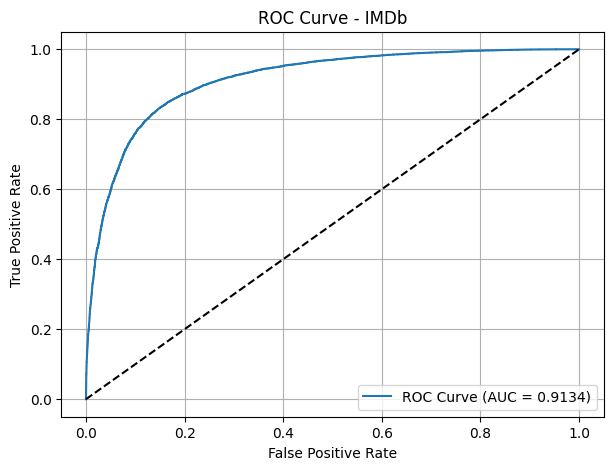

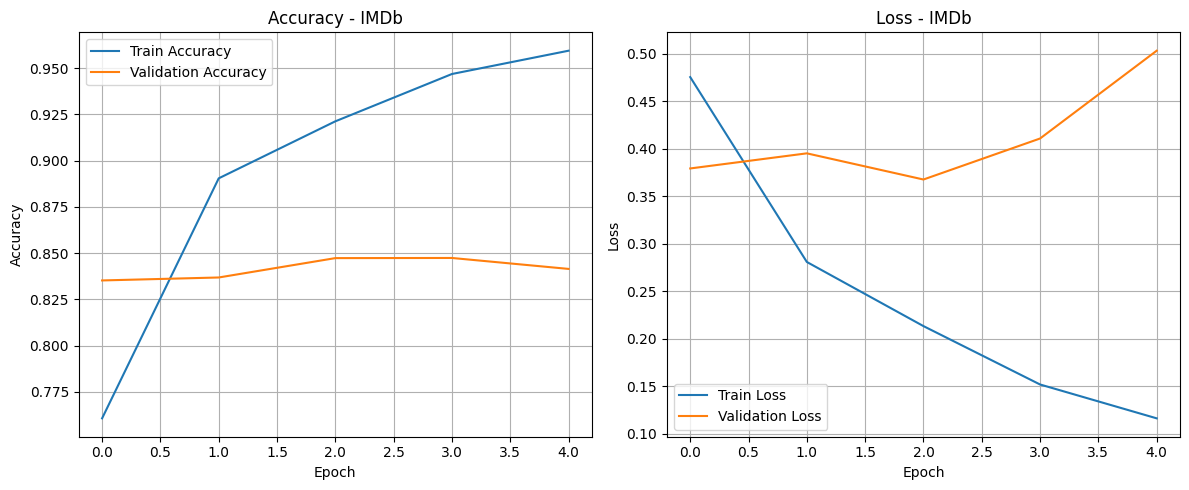

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import numpy as np

# Prediksi Probabilitas
imdb_y_pred_prob = imdb_model.predict(imdb_test_padded)
imdb_y_pred = (imdb_y_pred_prob > 0.5).astype("int32")

# Classification Report
print("Classification Report:")
print(classification_report(imdb_test_labels, imdb_y_pred, digits=4))

# ROC & AUC
imdb_auc = roc_auc_score(imdb_test_labels, imdb_y_pred_prob)
imdb_fpr, imdb_tpr, _ = roc_curve(imdb_test_labels, imdb_y_pred_prob)

plt.figure(figsize=(7, 5))
plt.plot(imdb_fpr, imdb_tpr, label=f'ROC Curve (AUC = {imdb_auc:.4f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - IMDb')
plt.legend(loc='lower right')
plt.grid()
plt.show()

# Visualisasi Akurasi dan Loss selama training
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(imdb_history.history['accuracy'], label='Train Accuracy')
plt.plot(imdb_history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy - IMDb')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(imdb_history.history['loss'], label='Train Loss')
plt.plot(imdb_history.history['val_loss'], label='Validation Loss')
plt.title('Loss - IMDb')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()

##7) Hyperparameter Tuning

In [ ]:
from tensorflow.keras.optimizers import Adam

# Grid of hyperparameter candidates
embedding_dims_list = [32, 64]
lstm_units_list = [32, 64]
batch_sizes = [64, 128]
learning_rates = [1e-3, 5e-4]

best_val_acc = 0
best_model = None
best_params = {}

for emb_dim in embedding_dims_list:
    for lstm_units in lstm_units_list:
        for batch_size in batch_sizes:
            for lr in learning_rates:
                print(f"\n🔧 Training with emb_dim={emb_dim}, lstm_units={lstm_units}, batch_size={batch_size}, lr={lr}")

                model = Sequential([
                    Embedding(input_dim=10000, output_dim=emb_dim, input_length=imdb_max_length),
                    Bidirectional(LSTM(lstm_units)),
                    Dense(64, activation='relu'),
                    Dense(1, activation='sigmoid')
                ])

                model.compile(
                    loss='binary_crossentropy',
                    optimizer=Adam(learning_rate=lr),
                    metrics=['accuracy']
                )

                history = model.fit(imdb_train_padded, imdb_train_labels,
                                    validation_data=(imdb_test_padded, imdb_test_labels),
                                    epochs=3,  # untuk efisiensi tuning
                                    batch_size=batch_size,
                                    verbose=0)

                val_acc = history.history['val_accuracy'][-1]
                print(f"Validation Accuracy: {val_acc:.4f}")

                if val_acc > best_val_acc:
                    best_val_acc = val_acc
                    best_model = model
                    best_params = {
                        'embedding_dim': emb_dim,
                        'lstm_units': lstm_units,
                        'batch_size': batch_size,
                        'learning_rate': lr
                    }

print("\n✅ Best Hyperparameters Found:")
print(best_params)
print(f"Best Validation Accuracy: {best_val_acc:.4f}")


🔧 Training with emb_dim=32, lstm_units=32, batch_size=64, lr=0.001


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Validation Accuracy: 0.8525

🔧 Training with emb_dim=32, lstm_units=32, batch_size=64, lr=0.0005
Validation Accuracy: 0.8506

🔧 Training with emb_dim=32, lstm_units=32, batch_size=128, lr=0.001
Validation Accuracy: 0.8534

🔧 Training with emb_dim=32, lstm_units=32, batch_size=128, lr=0.0005
Validation Accuracy: 0.8318

🔧 Training with emb_dim=32, lstm_units=64, batch_size=64, lr=0.001
Validation Accuracy: 0.8437

🔧 Training with emb_dim=32, lstm_units=64, batch_size=64, lr=0.0005
Validation Accuracy: 0.8510

🔧 Training with emb_dim=32, lstm_units=64, batch_size=128, lr=0.001
Validation Accuracy: 0.8459

🔧 Training with emb_dim=32, lstm_units=64, batch_size=128, lr=0.0005
Validation Accuracy: 0.8498

🔧 Training with emb_dim=64, lstm_units=32, batch_size=64, lr=0.001
Validation Accuracy: 0.8495

🔧 Training with emb_dim=64, lstm_units=32, batch_size=64, lr=0.0005
Validation Accuracy: 0.8398

🔧 Training with emb_dim=64, lstm_units=32, batch_size=128, lr=0.001
Validation Accuracy: 0.8321

🔧

#B. ReviewTokoBaju.csv Dataset

##1) Load dan Preprocess Data

In [ ]:
import pandas as pd

baju_df = pd.read_csv('/content/ReviewTokoBaju.csv')
print("Kolom yang tersedia:", baju_df.columns)
baju_df.head()

Kolom yang tersedia: Index(['Unnamed: 0', 'Clothing ID', 'Age', 'Title', 'Review Text', 'Rating',
       'Recommended IND', 'Positive Feedback Count', 'Division Name',
       'Department Name', 'Class Name'],
      dtype='object')


,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [ ]:
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, Dense

# Load data
baju_df = pd.read_csv('/content/ReviewTokoBaju.csv')

# Ambil teks dan label
baju_texts = baju_df['Review Text'].astype(str).values  # pastikan string
baju_labels = baju_df['Recommended IND'].values         # label biner

# Split train-test
baju_X_train, baju_X_test, baju_y_train, baju_y_test = train_test_split(
    baju_texts, baju_labels, test_size=0.2, random_state=42
)

# Tokenizer & Padding
baju_tokenizer = tf.keras.preprocessing.text.Tokenizer(num_words=10000, oov_token="<OOV>")
baju_tokenizer.fit_on_texts(baju_X_train)

baju_X_train_seq = baju_tokenizer.texts_to_sequences(baju_X_train)
baju_X_test_seq = baju_tokenizer.texts_to_sequences(baju_X_test)

baju_maxlen = 100
baju_X_train_pad = pad_sequences(baju_X_train_seq, maxlen=baju_maxlen, padding='post', truncating='post')
baju_X_test_pad = pad_sequences(baju_X_test_seq, maxlen=baju_maxlen, padding='post', truncating='post')

##2) Build dan Train Model

In [ ]:
# Model BiRNN untuk Review Toko Baju
baju_model = Sequential([
    Embedding(input_dim=10000, output_dim=64, input_length=baju_maxlen),
    Bidirectional(LSTM(64)),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

baju_model.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

baju_history = baju_model.fit(
    baju_X_train_pad, baju_y_train,
    validation_data=(baju_X_test_pad, baju_y_test),
    epochs=5,
    batch_size=128
)

# Evaluasi awal
baju_loss, baju_acc = baju_model.evaluate(baju_X_test_pad, baju_y_test)
print(f"\nTest Accuracy (Review Toko Baju): {baju_acc:.4f}")

Epoch 1/5


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


147/147 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - accuracy: 0.8309 - loss: 0.4546 - val_accuracy: 0.8904 - val_loss: 0.2596
Epoch 2/5
147/147 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.9070 - loss: 0.2313 - val_accuracy: 0.8685 - val_loss: 0.2820
Epoch 3/5
147/147 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - accuracy: 0.9275 - loss: 0.1891 - val_accuracy: 0.8948 - val_loss: 0.2566
Epoch 4/5
147/147 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.9443 - loss: 0.1496 - val_accuracy: 0.8953 - val_loss: 0.3051
Epoch 5/5
147/147 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.9534 - loss: 0.1341 - val_accuracy: 0.8827 - val_loss: 0.2787
147/147 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8769 - loss: 0.2821

Test Accuracy (Review Toko Baju): 0.8827


##3) Matriks Evaluasi

147/147 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
Classification Report (Review Toko Baju):
              precision    recall  f1-score   support

           0     0.6534    0.7509    0.6987       851
           1     0.9430    0.9119    0.9272      3847

    accuracy                         0.8827      4698
   macro avg     0.7982    0.8314    0.8130      4698
weighted avg     0.8905    0.8827    0.8858      4698



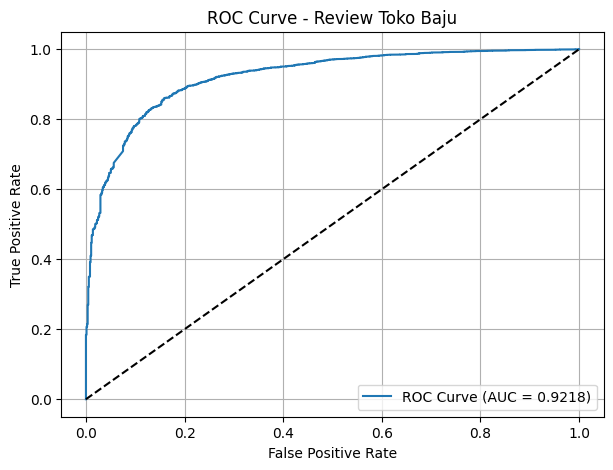

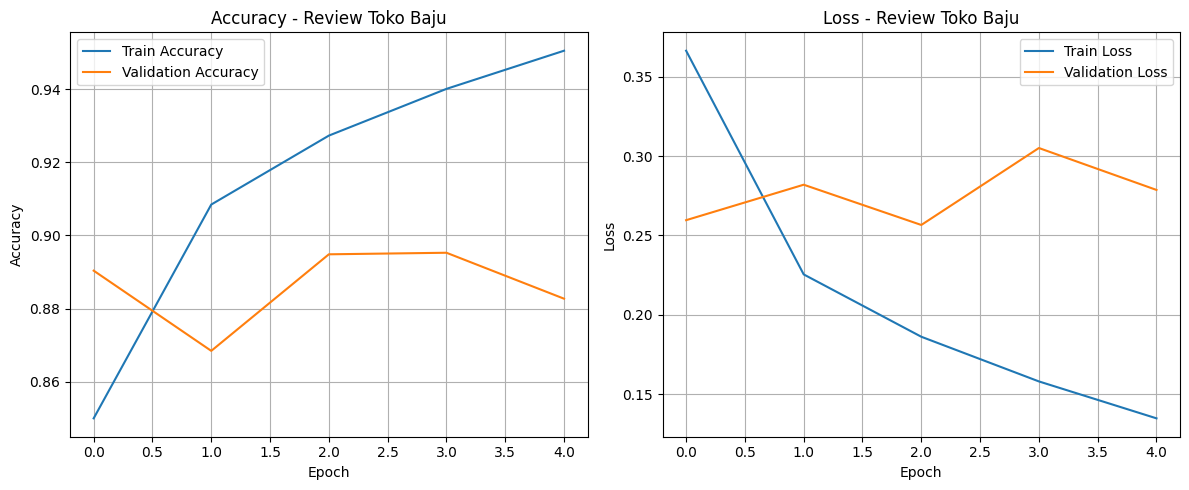

In [ ]:
from sklearn.metrics import classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Prediksi probabilitas dan kelas
baju_y_pred_prob = baju_model.predict(baju_X_test_pad)
baju_y_pred = (baju_y_pred_prob > 0.5).astype("int32")

# Classification report
print("Classification Report (Review Toko Baju):")
print(classification_report(baju_y_test, baju_y_pred, digits=4))

# ROC & AUC
baju_auc = roc_auc_score(baju_y_test, baju_y_pred_prob)
baju_fpr, baju_tpr, _ = roc_curve(baju_y_test, baju_y_pred_prob)

plt.figure(figsize=(7, 5))
plt.plot(baju_fpr, baju_tpr, label=f'ROC Curve (AUC = {baju_auc:.4f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Review Toko Baju')
plt.legend()
plt.grid()
plt.show()

# Plot akurasi dan loss
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(baju_history.history['accuracy'], label='Train Accuracy')
plt.plot(baju_history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy - Review Toko Baju')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(baju_history.history['loss'], label='Train Loss')
plt.plot(baju_history.history['val_loss'], label='Validation Loss')
plt.title('Loss - Review Toko Baju')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()

##4) Hyperparameter Tuning

In [ ]:
from tensorflow.keras.optimizers import Adam

# Hyperparameter grids
baju_embedding_dims = [32, 64]
baju_lstm_units = [32, 64]
baju_batch_sizes = [64, 128]
baju_learning_rates = [1e-3, 5e-4]

# Track the best model
baju_best_val_acc = 0
baju_best_model = None
baju_best_params = {}

for emb_dim in baju_embedding_dims:
    for lstm_unit in baju_lstm_units:
        for batch_size in baju_batch_sizes:
            for lr in baju_learning_rates:
                print(f"\n🔧 Training with emb_dim={emb_dim}, lstm_units={lstm_unit}, batch_size={batch_size}, lr={lr}")

                model = Sequential([
                    Embedding(input_dim=10000, output_dim=emb_dim, input_length=baju_maxlen),
                    Bidirectional(LSTM(lstm_unit)),
                    Dense(64, activation='relu'),
                    Dense(1, activation='sigmoid')
                ])

                model.compile(
                    loss='binary_crossentropy',
                    optimizer=Adam(learning_rate=lr),
                    metrics=['accuracy']
                )

                history = model.fit(
                    baju_X_train_pad, baju_y_train,
                    validation_data=(baju_X_test_pad, baju_y_test),
                    epochs=3,
                    batch_size=batch_size,
                    verbose=0
                )

                val_acc = history.history['val_accuracy'][-1]
                print(f"Validation Accuracy: {val_acc:.4f}")

                if val_acc > baju_best_val_acc:
                    baju_best_val_acc = val_acc
                    baju_best_model = model
                    baju_best_params = {
                        'embedding_dim': emb_dim,
                        'lstm_units': lstm_unit,
                        'batch_size': batch_size,
                        'learning_rate': lr
                    }

print("\n✅ Best Hyperparameters Found (Review Toko Baju):")
print(baju_best_params)
print(f"Best Validation Accuracy: {baju_best_val_acc:.4f}")


🔧 Training with emb_dim=32, lstm_units=32, batch_size=64, lr=0.001


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Validation Accuracy: 0.8910

🔧 Training with emb_dim=32, lstm_units=32, batch_size=64, lr=0.0005
Validation Accuracy: 0.8966

🔧 Training with emb_dim=32, lstm_units=32, batch_size=128, lr=0.001
Validation Accuracy: 0.8976

🔧 Training with emb_dim=32, lstm_units=32, batch_size=128, lr=0.0005
Validation Accuracy: 0.8963

🔧 Training with emb_dim=32, lstm_units=64, batch_size=64, lr=0.001
Validation Accuracy: 0.8963

🔧 Training with emb_dim=32, lstm_units=64, batch_size=64, lr=0.0005
Validation Accuracy: 0.8870

🔧 Training with emb_dim=32, lstm_units=64, batch_size=128, lr=0.001
Validation Accuracy: 0.8972

🔧 Training with emb_dim=32, lstm_units=64, batch_size=128, lr=0.0005
Validation Accuracy: 0.8987

🔧 Training with emb_dim=64, lstm_units=32, batch_size=64, lr=0.001
Validation Accuracy: 0.8927

🔧 Training with emb_dim=64, lstm_units=32, batch_size=64, lr=0.0005
Validation Accuracy: 0.8972

🔧 Training with emb_dim=64, lstm_units=32, batch_size=128, lr=0.001
Validation Accuracy: 0.8942

🔧

#C. DeteksiSarkasme.json Dataset

##1) Load dan Preprocessing Data

In [ ]:
import json

# Load data dari JSON
sarkas_texts = []
sarkas_labels = []

with open('/content/DeteksiSarkasme.json', 'r') as f:
    for line in f:
        item = json.loads(line)
        sarkas_texts.append(item['headline'])
        sarkas_labels.append(item['is_sarcastic'])

# Split train/test
from sklearn.model_selection import train_test_split

sarkas_X_train, sarkas_X_test, sarkas_y_train, sarkas_y_test = train_test_split(
    sarkas_texts, sarkas_labels, test_size=0.2, random_state=42
)

# Tokenisasi & Padding
sarkas_tokenizer = tf.keras.preprocessing.text.Tokenizer(num_words=10000, oov_token='<OOV>')
sarkas_tokenizer.fit_on_texts(sarkas_X_train)

sarkas_X_train_seq = sarkas_tokenizer.texts_to_sequences(sarkas_X_train)
sarkas_X_test_seq = sarkas_tokenizer.texts_to_sequences(sarkas_X_test)

sarkas_maxlen = 100
sarkas_X_train_pad = pad_sequences(sarkas_X_train_seq, maxlen=sarkas_maxlen, padding='post', truncating='post')
sarkas_X_test_pad = pad_sequences(sarkas_X_test_seq, maxlen=sarkas_maxlen, padding='post', truncating='post')

##2) Build dan Train Model

In [ ]:
import numpy as np

# Convert labels to numpy array
sarkas_y_train = np.array(sarkas_y_train)
sarkas_y_test = np.array(sarkas_y_test)

sarkas_model = Sequential([
    Embedding(input_dim=10000, output_dim=64, input_length=sarkas_maxlen),
    Bidirectional(LSTM(64)),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

sarkas_model.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

sarkas_history = sarkas_model.fit(
    sarkas_X_train_pad, sarkas_y_train,
    validation_data=(sarkas_X_test_pad, sarkas_y_test),
    epochs=5,
    batch_size=128
)

# Evaluasi awal
sarkas_loss, sarkas_acc = sarkas_model.evaluate(sarkas_X_test_pad, sarkas_y_test)
print(f"\nTest Accuracy (Deteksi Sarkasme): {sarkas_acc:.4f}")

Epoch 1/5
167/167 ━━━━━━━━━━━━━━━━━━━━ 6s 17ms/step - accuracy: 0.6783 - loss: 0.5546 - val_accuracy: 0.8564 - val_loss: 0.3229
Epoch 2/5
167/167 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.9131 - loss: 0.2175 - val_accuracy: 0.8680 - val_loss: 0.3118
Epoch 3/5
167/167 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.9563 - loss: 0.1258 - val_accuracy: 0.8630 - val_loss: 0.3554
Epoch 4/5
167/167 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.9769 - loss: 0.0735 - val_accuracy: 0.8570 - val_loss: 0.4628
Epoch 5/5
167/167 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - accuracy: 0.9853 - loss: 0.0471 - val_accuracy: 0.8497 - val_loss: 0.5446
167/167 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8495 - loss: 0.5409

Test Accuracy (Deteksi Sarkasme): 0.8497


##3) Matriks Evaluasi dan Visualisasi

167/167 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step
Classification Report (Deteksi Sarkasme):
              precision    recall  f1-score   support

           0     0.8559    0.8802    0.8679      2996
           1     0.8412    0.8107    0.8257      2346

    accuracy                         0.8497      5342
   macro avg     0.8486    0.8455    0.8468      5342
weighted avg     0.8494    0.8497    0.8493      5342



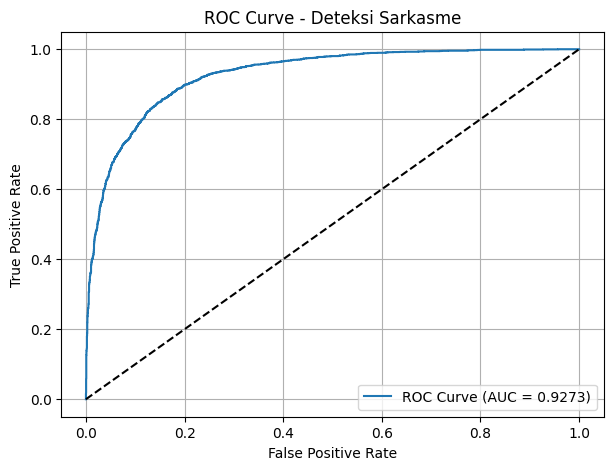

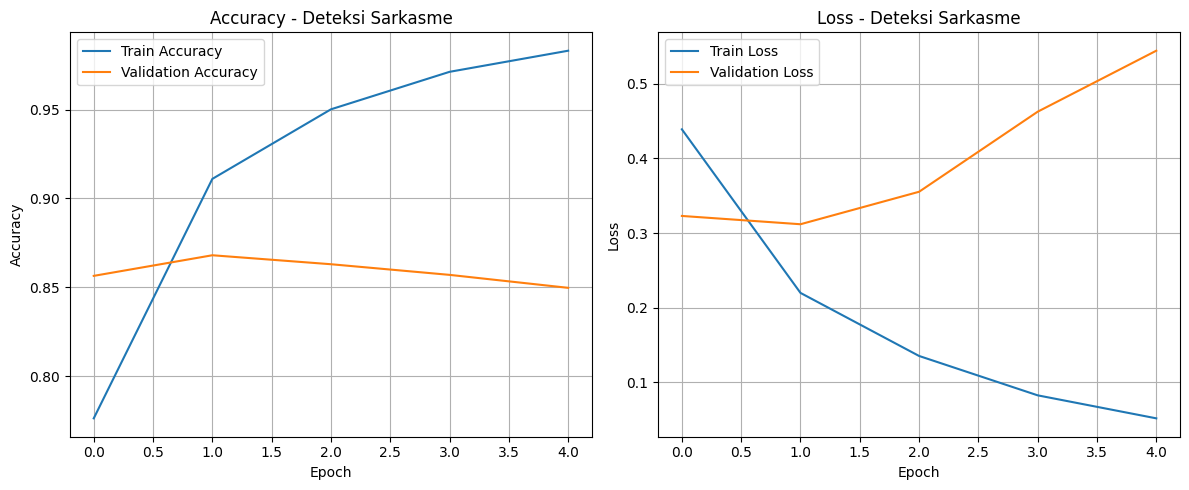

In [ ]:
from sklearn.metrics import classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Prediksi probabilitas dan kelas
sarkas_y_pred_prob = sarkas_model.predict(sarkas_X_test_pad)
sarkas_y_pred = (sarkas_y_pred_prob > 0.5).astype("int32")

# Classification report
print("Classification Report (Deteksi Sarkasme):")
print(classification_report(sarkas_y_test, sarkas_y_pred, digits=4))

# ROC Curve dan AUC
sarkas_auc = roc_auc_score(sarkas_y_test, sarkas_y_pred_prob)
sarkas_fpr, sarkas_tpr, _ = roc_curve(sarkas_y_test, sarkas_y_pred_prob)

plt.figure(figsize=(7, 5))
plt.plot(sarkas_fpr, sarkas_tpr, label=f'ROC Curve (AUC = {sarkas_auc:.4f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Deteksi Sarkasme')
plt.legend()
plt.grid()
plt.show()

# Visualisasi Akurasi dan Loss
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(sarkas_history.history['accuracy'], label='Train Accuracy')
plt.plot(sarkas_history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy - Deteksi Sarkasme')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(sarkas_history.history['loss'], label='Train Loss')
plt.plot(sarkas_history.history['val_loss'], label='Validation Loss')
plt.title('Loss - Deteksi Sarkasme')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()

#4) Hyperparameter Tuning

In [ ]:
from tensorflow.keras.optimizers import Adam
import numpy as np

# Pastikan label sudah dalam bentuk numpy array
sarkas_y_train = np.array(sarkas_y_train)
sarkas_y_test = np.array(sarkas_y_test)

# Hyperparameter grids
sarkas_embedding_dims = [32, 64]
sarkas_lstm_units = [32, 64]
sarkas_batch_sizes = [64, 128]
sarkas_learning_rates = [1e-3, 5e-4]

sarkas_best_val_acc = 0
sarkas_best_model = None
sarkas_best_params = {}

for emb_dim in sarkas_embedding_dims:
    for lstm_unit in sarkas_lstm_units:
        for batch_size in sarkas_batch_sizes:
            for lr in sarkas_learning_rates:
                print(f"\n🔧 Training with emb_dim={emb_dim}, lstm_units={lstm_unit}, batch_size={batch_size}, lr={lr}")

                model = Sequential([
                    Embedding(input_dim=10000, output_dim=emb_dim, input_length=sarkas_maxlen),
                    Bidirectional(LSTM(lstm_unit)),
                    Dense(64, activation='relu'),
                    Dense(1, activation='sigmoid')
                ])

                model.compile(
                    loss='binary_crossentropy',
                    optimizer=Adam(learning_rate=lr),
                    metrics=['accuracy']
                )

                history = model.fit(
                    sarkas_X_train_pad, sarkas_y_train,
                    validation_data=(sarkas_X_test_pad, sarkas_y_test),
                    epochs=3,  # cepat untuk tuning
                    batch_size=batch_size,
                    verbose=0
                )

                val_acc = history.history['val_accuracy'][-1]
                print(f"Validation Accuracy: {val_acc:.4f}")

                if val_acc > sarkas_best_val_acc:
                    sarkas_best_val_acc = val_acc
                    sarkas_best_model = model
                    sarkas_best_params = {
                        'embedding_dim': emb_dim,
                        'lstm_units': lstm_unit,
                        'batch_size': batch_size,
                        'learning_rate': lr
                    }

print("\n✅ Best Hyperparameters Found (Deteksi Sarkasme):")
print(sarkas_best_params)
print(f"Best Validation Accuracy: {sarkas_best_val_acc:.4f}")


🔧 Training with emb_dim=32, lstm_units=32, batch_size=64, lr=0.001


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Validation Accuracy: 0.8620

🔧 Training with emb_dim=32, lstm_units=32, batch_size=64, lr=0.0005
Validation Accuracy: 0.8579

🔧 Training with emb_dim=32, lstm_units=32, batch_size=128, lr=0.001
Validation Accuracy: 0.8600

🔧 Training with emb_dim=32, lstm_units=32, batch_size=128, lr=0.0005
Validation Accuracy: 0.8622

🔧 Training with emb_dim=32, lstm_units=64, batch_size=64, lr=0.001
Validation Accuracy: 0.8622

🔧 Training with emb_dim=32, lstm_units=64, batch_size=64, lr=0.0005
Validation Accuracy: 0.8575

🔧 Training with emb_dim=32, lstm_units=64, batch_size=128, lr=0.001
Validation Accuracy: 0.8568

🔧 Training with emb_dim=32, lstm_units=64, batch_size=128, lr=0.0005
Validation Accuracy: 0.8626

🔧 Training with emb_dim=64, lstm_units=32, batch_size=64, lr=0.001
Validation Accuracy: 0.8566

🔧 Training with emb_dim=64, lstm_units=32, batch_size=64, lr=0.0005
Validation Accuracy: 0.8626

🔧 Training with emb_dim=64, lstm_units=32, batch_size=128, lr=0.001
Validation Accuracy: 0.8611

🔧